## Using personality tests to assess suitability for different roles and responsibilities

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from random import sample
import seaborn as sns
sns.set_theme()
#plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,10)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data-final-clean.csv')


# Exploratory Data Analysis

In [3]:
data.head(3)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB


In [4]:
# draw 10,000 samples

data_sample = data.sample(10000)

In [5]:
data_sample.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
762684,4.0,3.0,2.0,3.0,3.0,1.0,1.0,2.0,4.0,2.0,...,1.0,5.0,1.0,4.0,1.0,5.0,4.0,3.0,5.0,US
98152,2.0,3.0,3.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,...,1.0,5.0,1.0,5.0,1.0,4.0,4.0,5.0,5.0,US
861451,5.0,1.0,4.0,1.0,5.0,1.0,5.0,2.0,5.0,1.0,...,2.0,5.0,2.0,4.0,1.0,5.0,2.0,5.0,4.0,US
235037,4.0,3.0,4.0,4.0,5.0,1.0,3.0,2.0,4.0,5.0,...,1.0,3.0,1.0,4.0,1.0,4.0,3.0,5.0,4.0,MY
206076,3.0,2.0,3.0,2.0,4.0,2.0,3.0,4.0,2.0,3.0,...,1.0,5.0,1.0,4.0,1.0,5.0,4.0,5.0,4.0,CA


In [6]:
# compute the mode of every personality trait and assign to new dataframe

data_sample['extraversion']=data_sample.loc[:,'EXT1':'EXT10'].mode(axis=1).max(axis=1)
data_sample['emotional_stability']=data_sample.loc[:,'EST1':'EST10'].mode(axis=1).max(axis=1)
data_sample['aggreableness']=data_sample.loc[:,'AGR1':'AGR10'].mode(axis=1).max(axis=1)
data_sample['conscientiousness']=data_sample.loc[:,'CSN1':'CSN10'].mode(axis=1).max(axis=1)
data_sample['openness']=data_sample.loc[:,'OPN1':'OPN10'].mode(axis=1).max(axis=1)

data_mode = data_sample.loc[:,'country':'openness']

In [7]:
# review

data_mode.head()

,country,extraversion,emotional_stability,aggreableness,conscientiousness,openness
762684,US,3.0,2.0,4.0,4.0,5.0
98152,US,2.0,2.0,4.0,5.0,5.0
861451,US,5.0,4.0,5.0,4.0,5.0
235037,MY,4.0,4.0,3.0,4.0,4.0
206076,CA,3.0,2.0,4.0,4.0,5.0


## Predict with KMeans

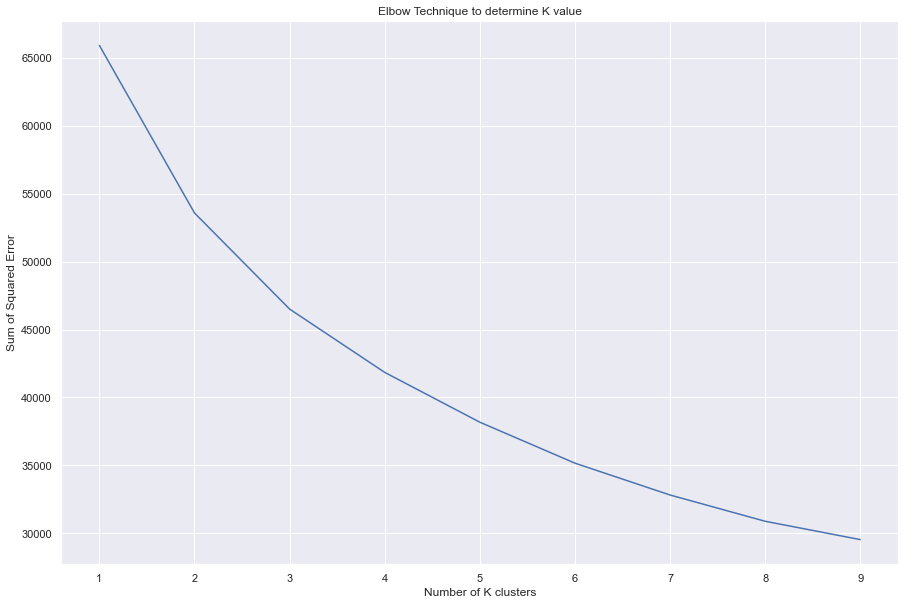

In [8]:
# compute optimum number of clusters for KMeans using Elbow Technique

x = data_mode.loc[:,'extraversion':'openness']
k = range(1,10)
sse=[]
for i in k:
    km = KMeans(n_clusters=i, random_state=0).fit(x)
    sse.append(km.inertia_)
    
plt.plot(k, sse);
plt.xlabel('Number of K clusters');
plt.ylabel('Sum of Squared Error');
plt.title('Elbow Technique to determine K value');

## Prediction by KMeans

In [9]:
x = data_mode.loc[:,'extraversion':'openness']
kmeans = KMeans(n_clusters=4, random_state=42).fit(x)
data_mode['clusters'] = kmeans.predict(x)
data_mode.head()

,country,extraversion,emotional_stability,aggreableness,conscientiousness,openness,clusters
762684,US,3.0,2.0,4.0,4.0,5.0,1
98152,US,2.0,2.0,4.0,5.0,5.0,1
861451,US,5.0,4.0,5.0,4.0,5.0,0
235037,MY,4.0,4.0,3.0,4.0,4.0,0
206076,CA,3.0,2.0,4.0,4.0,5.0,1


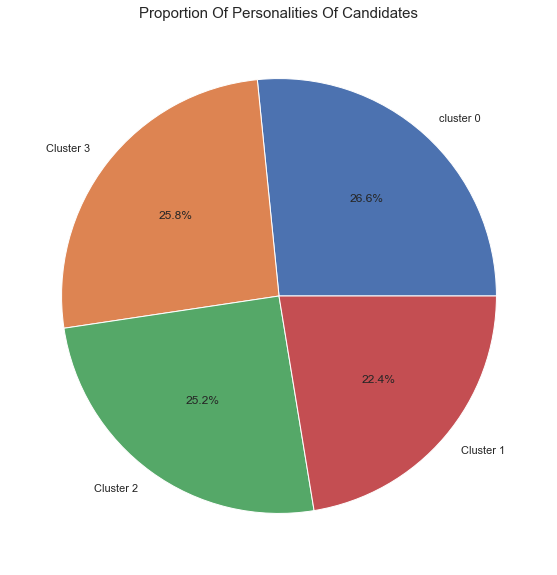

In [10]:
label = ['cluster 0','Cluster 3','Cluster 2','Cluster 1']
plt.pie(data_mode['clusters'].value_counts(), labels=label, autopct='%.1f%%')
plt.title('Proportion Of Personalities Of Candidates', fontsize=15)
plt.show()

In [11]:
data_mode['clusters'].value_counts()

0    2659
1    2578
3    2521
2    2242
Name: clusters, dtype: int64

## Use One way anova to test if each cluster is significantly different from the others
### Hypothesis testing

In [12]:
cluster_0_extraversion = data_mode.loc[data_mode['clusters']==0, 'extraversion']
cluster_1_extraversion = data_mode.loc[data_mode['clusters']==1, 'extraversion']
cluster_2_extraversion = data_mode.loc[data_mode['clusters']==2, 'extraversion']
cluster_3_extraversion = data_mode.loc[data_mode['clusters']==3, 'extraversion']

In [13]:
from scipy.stats import f_oneway

f_oneway(cluster_0_extraversion, cluster_1_extraversion, cluster_2_extraversion,cluster_3_extraversion)

F_onewayResult(statistic=2863.160874728135, pvalue=0.0)

In [14]:
cluster_0_emotional_stability = data_mode.loc[data_mode['clusters']==0, 'emotional_stability']
cluster_1_emotional_stability = data_mode.loc[data_mode['clusters']==1, 'emotional_stability']
cluster_2_emotional_stability = data_mode.loc[data_mode['clusters']==2, 'emotional_stability']
cluster_3_emotional_stability = data_mode.loc[data_mode['clusters']==3, 'emotional_stability']

In [15]:

f_oneway(cluster_0_emotional_stability, cluster_1_emotional_stability, cluster_2_emotional_stability,
         cluster_3_emotional_stability)

F_onewayResult(statistic=5738.394250082399, pvalue=0.0)

In [16]:
cluster_0_aggreableness = data_mode.loc[data_mode['clusters']==0, 'aggreableness']
cluster_1_aggreableness = data_mode.loc[data_mode['clusters']==1, 'aggreableness']
cluster_2_aggreableness = data_mode.loc[data_mode['clusters']==2, 'aggreableness']
cluster_3_aggreableness = data_mode.loc[data_mode['clusters']==3, 'aggreableness']

In [17]:
f_oneway(cluster_0_aggreableness, cluster_1_aggreableness, cluster_2_aggreableness,
         cluster_3_aggreableness)

F_onewayResult(statistic=129.60528857779767, pvalue=2.2911372853621735e-82)

In [18]:
cluster_0_conscientiousness = data_mode.loc[data_mode['clusters']==0, 'conscientiousness']
cluster_1_conscientiousness = data_mode.loc[data_mode['clusters']==1, 'conscientiousness']
cluster_2_conscientiousness = data_mode.loc[data_mode['clusters']==2, 'conscientiousness']
cluster_3_conscientiousness = data_mode.loc[data_mode['clusters']==3, 'conscientiousness']

In [19]:
f_oneway(cluster_0_conscientiousness, cluster_1_conscientiousness, cluster_2_conscientiousness,
         cluster_3_conscientiousness)

F_onewayResult(statistic=2995.197346440096, pvalue=0.0)

In [20]:
cluster_0_openness = data_mode.loc[data_mode['clusters']==0, 'openness']
cluster_1_openness = data_mode.loc[data_mode['clusters']==1, 'openness']
cluster_2_openness = data_mode.loc[data_mode['clusters']==2, 'openness']
cluster_3_openness = data_mode.loc[data_mode['clusters']==3, 'openness']

In [21]:
f_oneway(cluster_0_openness, cluster_1_openness, cluster_2_openness,
         cluster_3_openness)

F_onewayResult(statistic=156.18634088822304, pvalue=6.233020436797118e-99)

In [22]:
clusters_0 = data_mode[data_mode['clusters']==0]
clusters_1 = data_mode[data_mode['clusters']==1]
clusters_2 = data_mode[data_mode['clusters']==2]
clusters_3 = data_mode[data_mode['clusters']==3]

## Test accuracy by Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier()
X = data_mode.drop(['country','clusters'],axis=1)
y = data_mode.clusters
sc = StandardScaler()
X = sc.fit_transform(X)
acc = round(np.mean(cross_val_score(rfc, X,y, cv=5, scoring='accuracy')),3)
print(f"Accuracy score is {acc}")

Accuracy score is 0.997


## Visualise KMeans Prediction With Boxplot

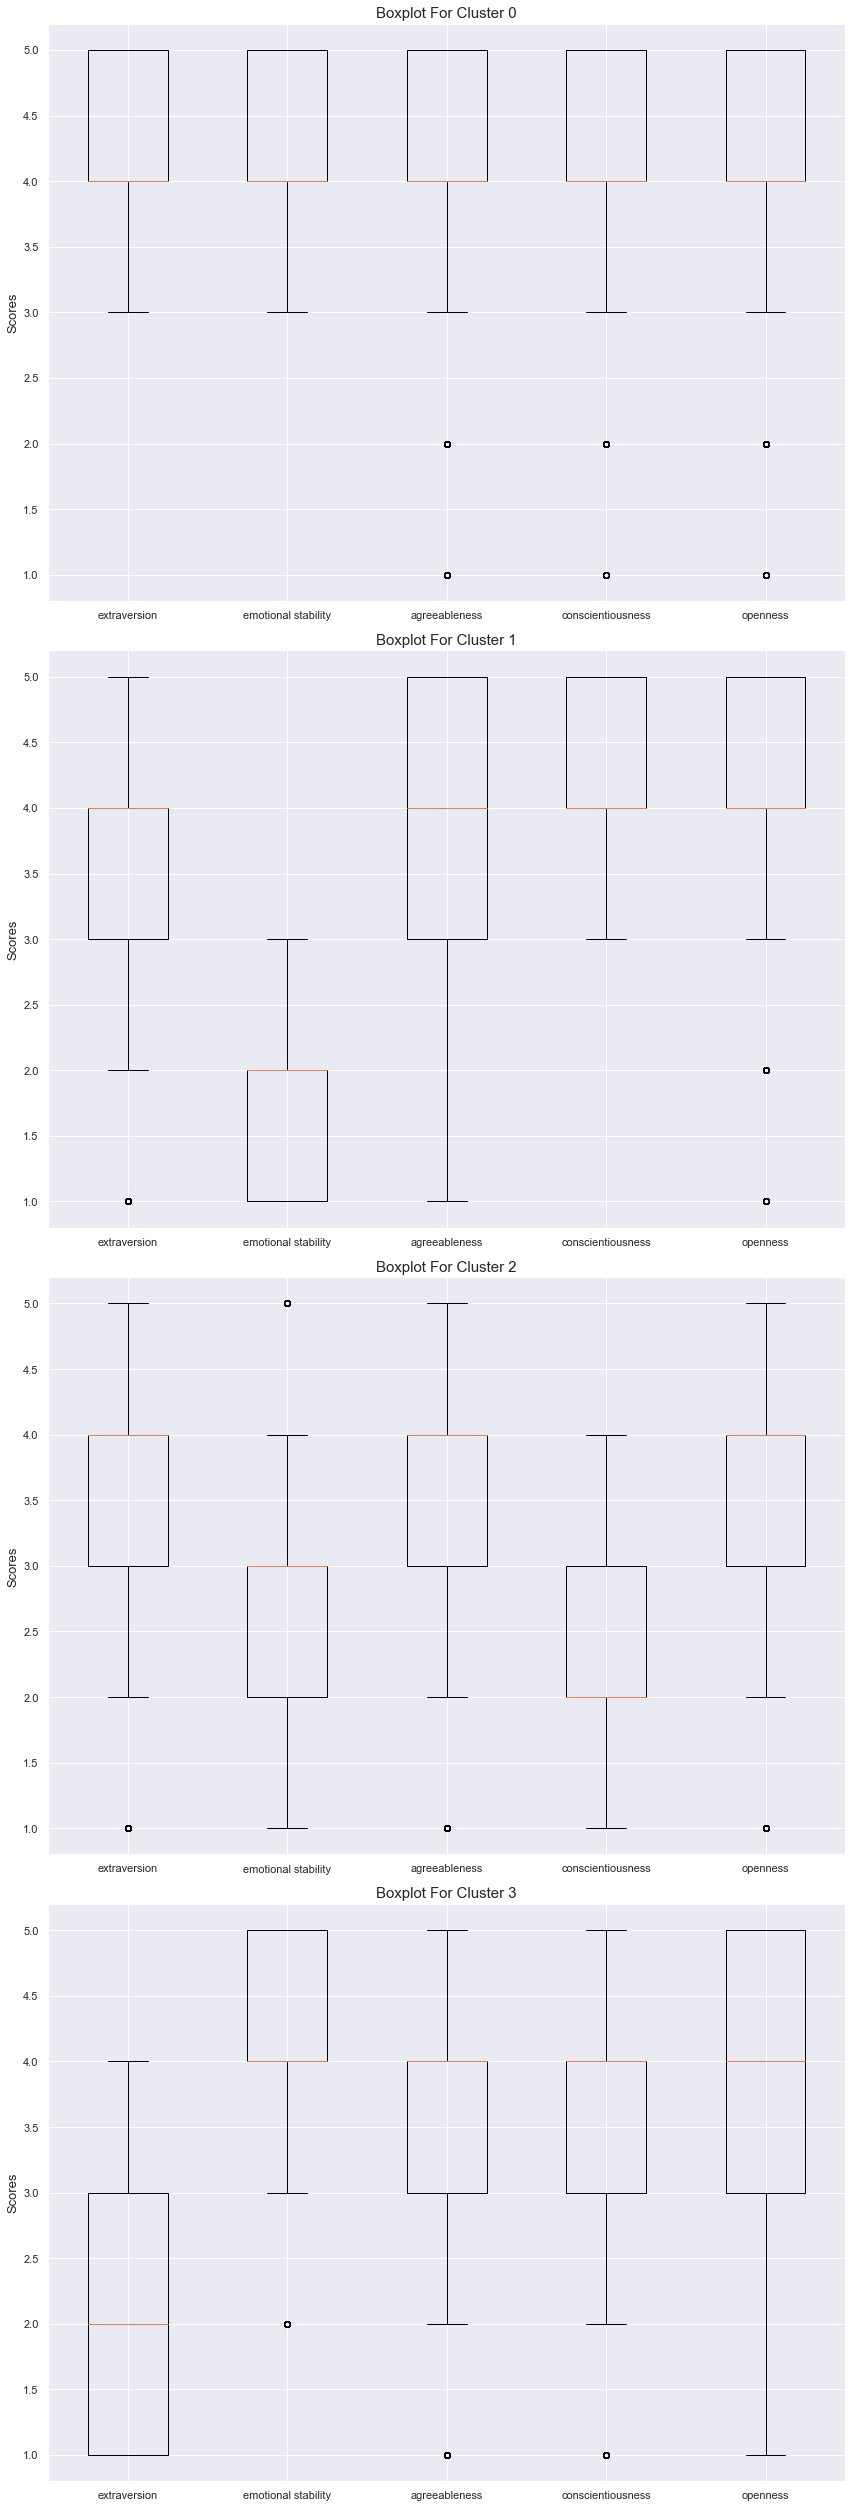

In [24]:
# visualize personality traits for cluster 1 prediction

fig = plt.figure(figsize=(12,35))
h=411
grp = [clusters_0, clusters_1, clusters_2, clusters_3]
grp_name = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
num = range(4)
for n, k, g  in zip(num, grp, grp_name):
    ax = fig.add_subplot(h)
    ax.boxplot(k.drop(['country','clusters'], axis=1));
    ax.set_xticklabels(['extraversion','emotional stability','agreeableness','conscientiousness','openness']);
    plt.title(f'Boxplot For {g}', fontsize=15)
    plt.ylabel('Scores', fontsize=13)
    h+=1
plt.tight_layout()
plt.show()

## Prediction

In [25]:
def predict_clusters(df):
    df['extraversion']=df.loc[:,'EXT1':'EXT10'].mode(axis=1).max(axis=1)
    df['emotional_stability']=df.loc[:,'EST1':'EST10'].mode(axis=1).max(axis=1)
    df['aggreableness']=df.loc[:,'AGR1':'AGR10'].mode(axis=1).max(axis=1)
    df['conscientiousness']=df.loc[:,'CSN1':'CSN10'].mode(axis=1).max(axis=1)
    df['openness']=df.loc[:,'OPN1':'OPN10'].mode(axis=1).max(axis=1)
    df = df.loc[:,'country':'openness']
    x = df.loc[:,'extraversion':'openness']
    df['clusters'] = kmeans.predict(x)
    return df

In [26]:
# prepare test sample

test_sample = data.sample(500)

In [27]:
# predict with test sample

test_pred = predict_clusters(test_sample)
test_pred.head()

,country,extraversion,emotional_stability,aggreableness,conscientiousness,openness,clusters
649436,US,3.0,1.0,1.0,3.0,2.0,2
103859,US,3.0,4.0,2.0,2.0,3.0,2
262944,CO,5.0,5.0,5.0,5.0,5.0,0
531676,CZ,3.0,3.0,2.0,3.0,4.0,2
698039,US,3.0,2.0,2.0,4.0,4.0,1


In [28]:
test_pred.clusters.value_counts()

1    134
0    126
2    123
3    117
Name: clusters, dtype: int64

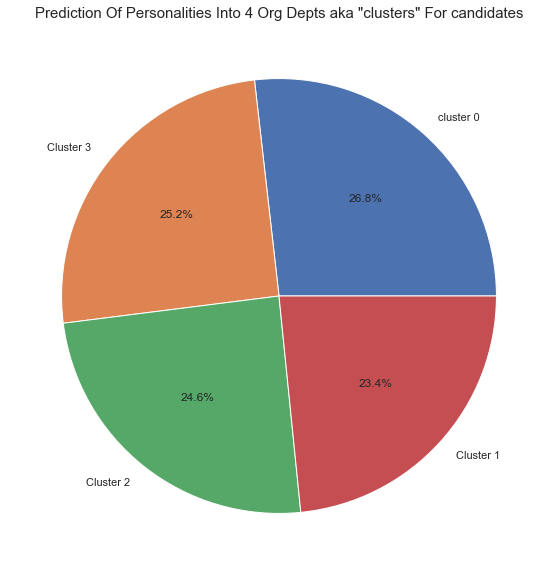

In [29]:
# visualize test sample personalities based on clusters

label = ['cluster 0','Cluster 3','Cluster 2','Cluster 1']
plt.pie(test_pred['clusters'].value_counts(), labels=label, autopct='%.1f%%')
plt.title('Prediction Of Personalities Into 4 Org Depts aka "clusters" For candidates', fontsize=15)
plt.show()

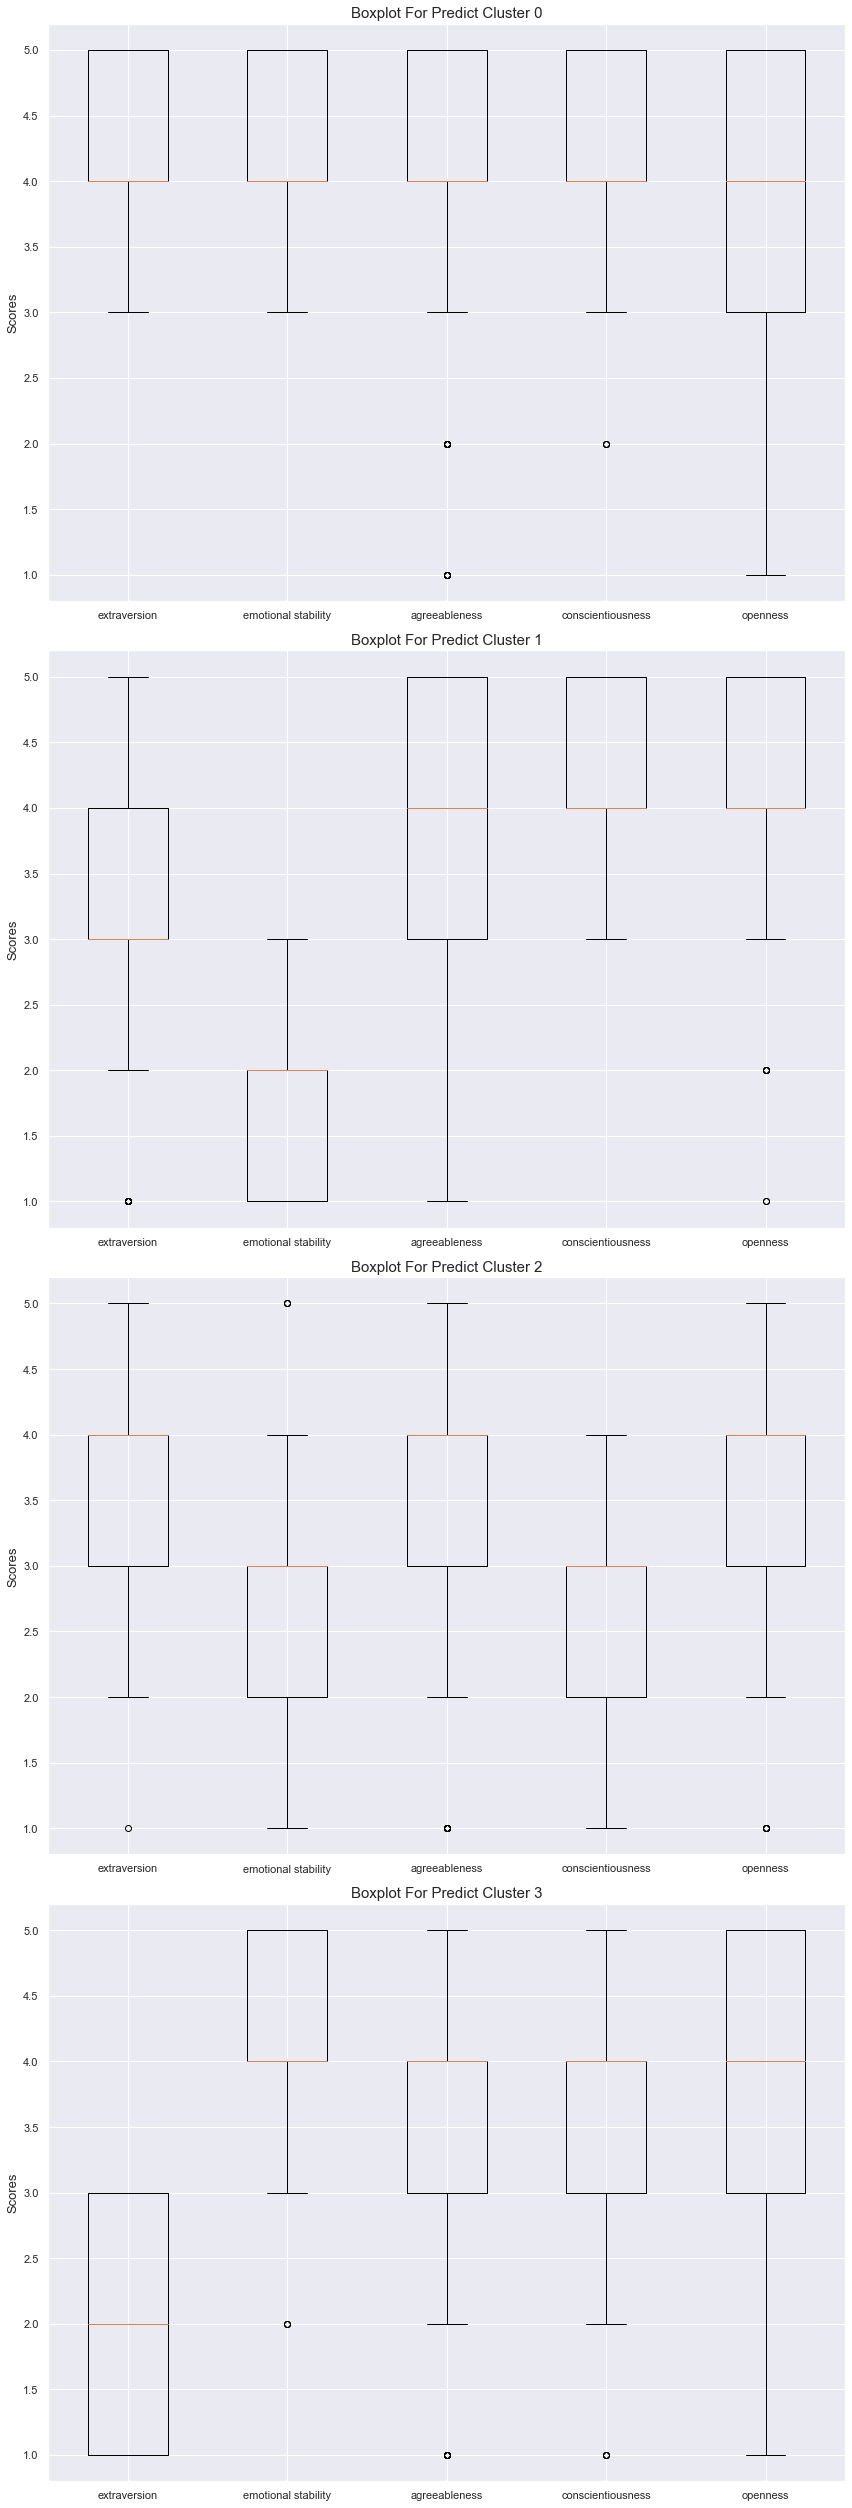

In [30]:
# visualize personality traits for cluster 1 prediction

predict_clusters_0 = test_pred[test_pred['clusters']==0]
predict_clusters_1 = test_pred[test_pred['clusters']==1]
predict_clusters_2 = test_pred[test_pred['clusters']==2]
predict_clusters_3 = test_pred[test_pred['clusters']==3]

fig = plt.figure(figsize=(12,35))
h=411
grp = [predict_clusters_0, predict_clusters_1, predict_clusters_2, predict_clusters_3]
grp_name = ['Predict Cluster 0', 'Predict Cluster 1', 'Predict Cluster 2', 'Predict Cluster 3']
num = range(4)
for n, k, g  in zip(num, grp, grp_name):
    ax = fig.add_subplot(h)
    ax.boxplot(k.drop(['country','clusters'], axis=1));
    ax.set_xticklabels(['extraversion','emotional stability','agreeableness','conscientiousness','openness']);
    plt.title(f'Boxplot For {g}', fontsize=15)
    plt.ylabel('Scores', fontsize=13)
    h+=1
plt.tight_layout()
plt.show()